# Generating Log-Linear Poisson Observations from GP Latent Trajectory
This notebook demonstrates how to generate log-linear Poisson observations from a Gaussian Process (GP) latent trajectory, given a Fisher Information SNR bound.

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from neurofisherSNR.latent_dynamics import generate_gp_trajectory
from neurofisherSNR.observation import gen_poisson_observations
from neurofisherSNR.optimize import initialize_C
from neurofisherSNR.snr import SNR_bound_instantaneous
from neurofisherSNR.vis_utils import plot_spike_train

## Set random seed and simulation parameters

In [2]:
np.random.seed(2)
# Default parameters
time_duration = 10
num_steps = 1000
time_range = np.linspace(0, time_duration, num_steps)
d_latent = 5
dt = time_range[1] - time_range[0]

## Generate GP latent trajectory
We will generate a latent trajectory with 5 dimensions and 1000 timepoints from Gaussian Process with a lengthscale of 0.5.

In [3]:
latent_trajectory = generate_gp_trajectory(
    time_range=time_range,
    d_latent=d_latent,
    lengthscale=0.5,
)

Visualize the generated latent trajectory, and confirm that the latent trajectory is normalized to have unit variance and zero mean.












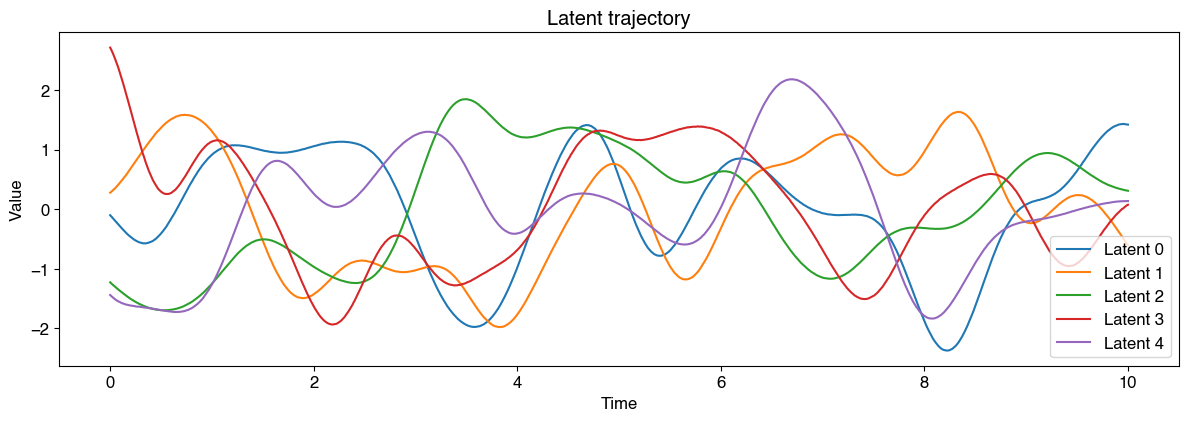

variance of latent trajectory: [1. 1. 1. 1. 1.]
mean of latent trajectory: [-2.24709140e-16  8.39439629e-16 -4.50639526e-16 -1.76039738e-16
  3.46889184e-16]


In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
fig.tight_layout()
ax.plot(time_range, latent_trajectory)
ax.set_title("Latent trajectory")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.legend(["Latent 0", "Latent 1", "Latent 2", "Latent 3", "Latent 4"])

plt.show()

print(f"variance of latent trajectory: {np.var(latent_trajectory, axis=0)}")
print(f"mean of latent trajectory: {np.mean(latent_trajectory, axis=0)}")

## Generate Poisson observations

In this notebook, we will generate a random loading matrix and scale it to match the target signal-to-noise ratio (SNR) per bin.












In [ ]:
p_sparse = 0.05
p_coherence = 1
target_rate_per_bin = 20.0 * dt  # (target_firing_rate in Hz * dt)
target_snr = 5  # dB
num_neurons = 50

`gen_poisson_observations` will generate and scale the loading matrix accordingly and simulate Poisson observations from a latent trajectory.












In [21]:
observations, C, bias, firing_rate_per_bin, snr = gen_poisson_observations(
    x=latent_trajectory,
    C=None,
    d_neurons=num_neurons,
    tgt_rate_per_bin=target_rate_per_bin,
    max_rate_per_bin=200 * dt,
    priority="max",
    p_coh=p_coherence,
    p_sparse=p_sparse,
    tgt_snr=target_snr,
    snr_fn=SNR_bound_instantaneous,
    verbose=True,
)

SNR: 1.73 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 3.83 dB, Gain: 1.41, Adjusted neurons: 8
SNR: 4.64 dB, Gain: 1.68, Adjusted neurons: 14
Converged after 3 iterations with relative error 7.28%


## Plotting observations with latent trajectory

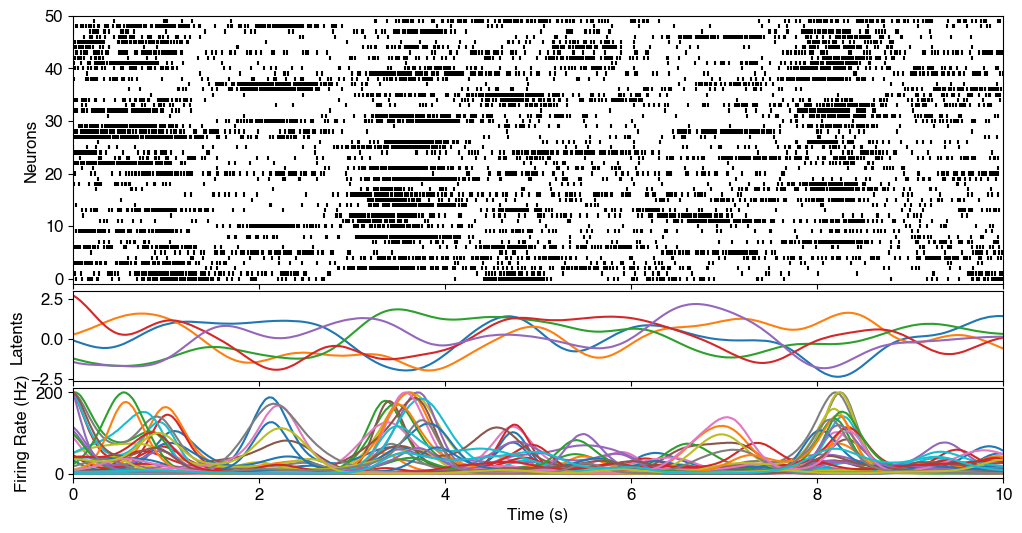

In [25]:
plot_spike_train(
    x=latent_trajectory,
    y=observations,
    num_neurons=num_neurons,
    dt=dt,
    time_range=time_range,
    firing_rates=firing_rate_per_bin / dt,  # Hz
)

# Effect of target SNR on the tuning curve
In general, the model with a sharper tuning curve will have higher SNR bound. 
We can see this by starting from the identical loading matrix and changing the target SNR.










SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 4.01 dB, Gain: 1.41, Adjusted neurons: 8
SNR: 4.87 dB, Gain: 1.68, Adjusted neurons: 15
Converged after 3 iterations with relative error 2.58%
SNR: -0.88 dB, Gain: 0.71, Adjusted neurons: 0
SNR: 0.49 dB, Gain: 0.84, Adjusted neurons: 0
SNR: 1.15 dB, Gain: 0.92, Adjusted neurons: 0
SNR: 1.47 dB, Gain: 0.96, Adjusted neurons: 1
SNR: 1.62 dB, Gain: 0.98, Adjusted neurons: 1
SNR: 1.70 dB, Gain: 0.99, Adjusted neurons: 1
SNR: 1.74 dB, Gain: 0.99, Adjusted neurons: 1
SNR: 1.76 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.77 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.00, Adjusted neurons: 1
SNR: 1.78 dB, Gain: 1.0

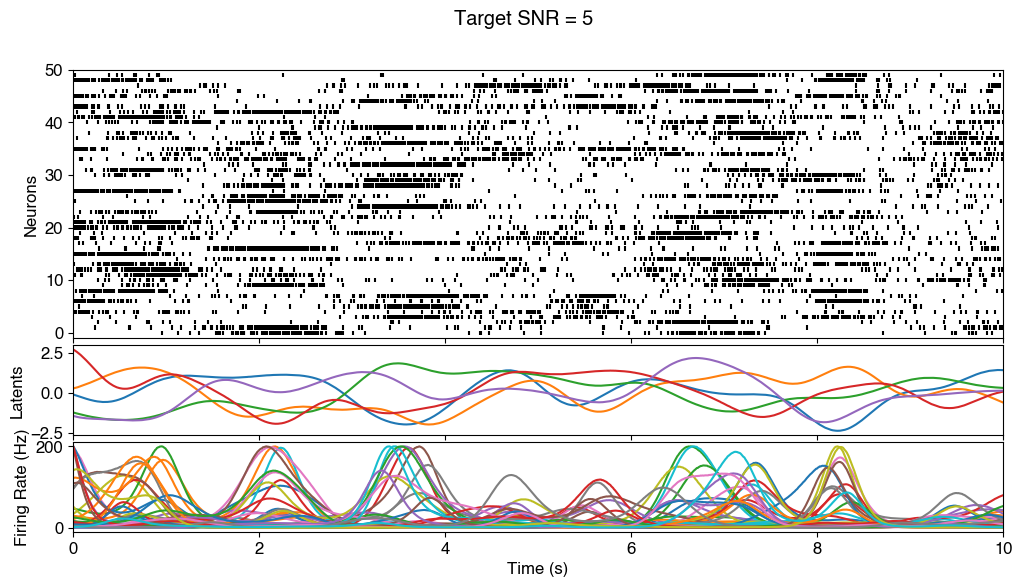

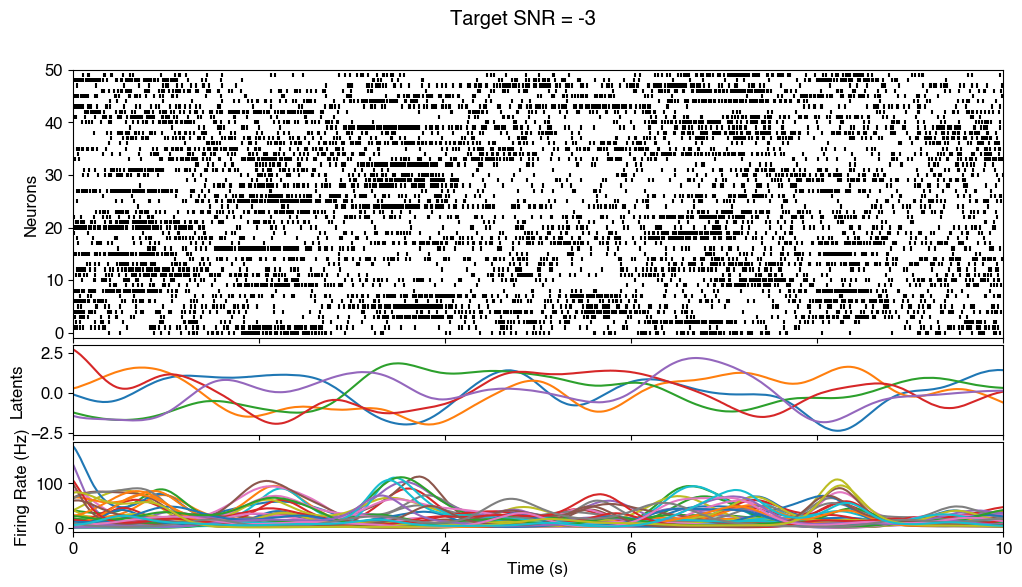

In [37]:
C_start = initialize_C(d_latent, num_neurons, p_coherence, p_sparse)
observations, _, bias, firing_rate_per_bin, snr = gen_poisson_observations(
    x=latent_trajectory,
    C=C_start,
    d_neurons=num_neurons,
    tgt_rate_per_bin=target_rate_per_bin,
    max_rate_per_bin=200 * dt,
    priority="max",
    p_coh=p_coherence,
    p_sparse=p_sparse,
    tgt_snr=5,
    snr_fn=SNR_bound_instantaneous,
    verbose=True,
)
fig = plot_spike_train(
    x=latent_trajectory,
    y=observations,
    num_neurons=num_neurons,
    dt=dt,
    time_range=time_range,
    firing_rates=firing_rate_per_bin / dt,  # Hz
)
fig.suptitle("Target SNR = 5")


observations, _, bias, firing_rate_per_bin, snr = gen_poisson_observations(
    x=latent_trajectory,
    C=C_start,
    d_neurons=num_neurons,
    tgt_rate_per_bin=target_rate_per_bin,
    max_rate_per_bin=200 * dt,
    priority="max",
    p_coh=p_coherence,
    p_sparse=p_sparse,
    tgt_snr=1,
    snr_fn=SNR_bound_instantaneous,
    verbose=True,
)
fig = plot_spike_train(
    x=latent_trajectory,
    y=observations,
    num_neurons=num_neurons,
    dt=dt,
    time_range=time_range,
    firing_rates=firing_rate_per_bin / dt,  # Hz
)
fig.suptitle("Target SNR = -3")
plt.show()